 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"></ul></div>

In [4]:
from PIL import Image
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
data_path = '/Users/stephanrasp/repositories/CGAN-towards-CBRAIN/datasets/facades/train/'

In [6]:
files = sorted(glob(data_path + '*')); files[:5]

['/Users/stephanrasp/repositories/CGAN-towards-CBRAIN/datasets/facades/train/1.jpg',
 '/Users/stephanrasp/repositories/CGAN-towards-CBRAIN/datasets/facades/train/10.jpg',
 '/Users/stephanrasp/repositories/CGAN-towards-CBRAIN/datasets/facades/train/100.jpg',
 '/Users/stephanrasp/repositories/CGAN-towards-CBRAIN/datasets/facades/train/101.jpg',
 '/Users/stephanrasp/repositories/CGAN-towards-CBRAIN/datasets/facades/train/102.jpg']

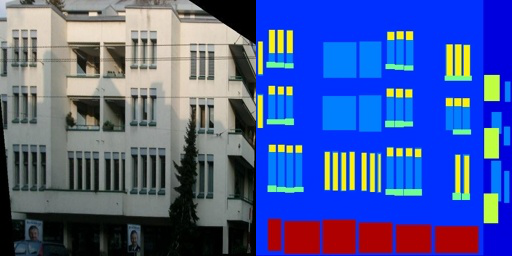

In [7]:
img = Image.open(files[0]); img

In [9]:
arr = np.array(img); arr.shape

(256, 512, 3)

In [11]:
img_size = arr.shape[0]; img_size

256

In [12]:
a_arr = arr[:, :img_size]
b_arr = arr[:, img_size:]

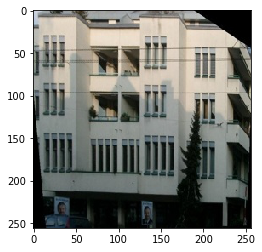

In [14]:
plt.imshow(a_arr);

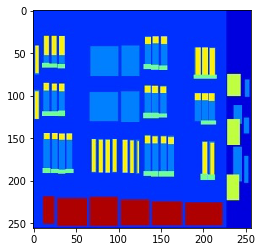

In [15]:
plt.imshow(b_arr);

In [16]:
def load_all_imgs(files):
    a_list = []
    b_list = []
    for fn in files:
        img_arr = np.array(Image.open(fn))
        a_list.append(img_arr[:, :img_size])
        b_list.append(img_arr[:, img_size:])
    return np.array(a_list), np.array(b_list)

In [17]:
a_imgs, b_imgs = load_all_imgs(files)

In [18]:
a_imgs.shape

(400, 256, 256, 3)

In [19]:
def gen(a_imgs, b_imgs, bs, n_batches, shuffle=False):
    while True:
        for i in range(n_batches):
            x = a_imgs[i*bs:(i+1)*bs]
            y = b_imgs[i*bs:(i+1)*bs]
            yield x, y

In [30]:
g = gen(a_imgs, b_imgs, 4, 100)

In [23]:
class DataGenerator(object):
    def __init__(self, files, bs=4):
        self.a_imgs, self.b_imgs = load_all_imgs(files)
        self.bs = bs
        self.n_samples = self.a_imgs.shape[0]
        self.n_batches = int(np.floor(self.n_samples / bs))
        self.gen = gen(self.a_imgs, self.b_imgs, bs, self.n_batches)        

In [27]:
class_gen = DataGenerator(files)